### Demographic and Health Survey (DHS) Data Preparation

Download the survey data (Household Recode Dataset and HIV dataset) from the Standard DHS survey website corresponding to Burundi in 2010.



In [484]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### File path

In [483]:
path = '/Users/cyuancheng/Documents/course/Springboard/Capstone2/data/'              
dhs_dict_file  = path+'DHS/BUHR61FL.DO'
dhs_file = path+'DHS/BUHR61FL.DTA'
dhs_hiv_file = path+'DHS/BUAR61FL.DTA'

### Help file

In [434]:
def get_dhs_dict(dhs_dict_file):
    dhs_dict = dict()
    with open(dhs_dict_file, 'r', errors='replace') as file:
        line = file.readline()
        while line:
            line = file.readline()
            if 'label variable' in line:
                code = line.split()[2]
                colname = ' '.join([x.strip('"') for x in line.split()[3:]])
                dhs_dict[code] = colname
    return dhs_dict

### Load DHS dataset

In [ ]:
dhs = pd.read_stata(dhs_file, convert_categoricals=False)
dhs_dict = get_dhs_dict(dhs_dict_file)
dhs = dhs.rename(columns=dhs_dict).dropna(axis=1)
print('Data Dimensions: {}'.format(dhs.shape))

In [464]:
dhs.columns.to_list()

['Case Identification',
 'Country code and phase',
 'Cluster number',
 'Household number',
 "Respondent's line number (answering Household questionnaire)",
 'Ultimate area unit',
 'Household sample weight (6 decimals)',
 'Month of interview',
 'Year of interview',
 'Date of interview (CMC)',
 'Number of household members',
 'Number of eligible women in household',
 'Number of eligible men in household',
 'Number of de jure members',
 'Number of de facto members',
 'Number of children 5 and under (de jure)',
 'Result of household interview',
 'Day of interview',
 'Number of visits',
 'Interviewer identification',
 'Keyer identification',
 'Ever-married sample',
 'Primary sampling unit',
 'Sample strata for sampling errors',
 'Stratification used in sample design',
 'Region',
 'Type of place of residence',
 'Household selected for male interview',
 'Household weight for male subsample (6 decimals)',
 'Field supervisor',
 'Field editor',
 'Office editor',
 'Number of eligible children for

### Data Cleaning

In [465]:
# select columns
data_dhs = dhs[[
    'Cluster number',
    'Time to get to water source (minutes)',
    'Has electricity',
    'Has mobile telephone',
    'Wealth index factor score (5 decimals)',
    'Education completed in single years']]

In [466]:
#check missing value
data_dhs.isnull().sum()

Cluster number                            0
Time to get to water source (minutes)     0
Has electricity                           0
Has mobile telephone                      0
Wealth index factor score (5 decimals)    0
Education completed in single years       0
dtype: int64

In [467]:
data_dhs['Wealth index factor score (5 decimals)'] = data_dhs['Wealth index factor score (5 decimals)']/100000

In [468]:
# check outliers
data_dhs.describe()

,Cluster number,Time to get to water source (minutes),Has electricity,Has mobile telephone,Wealth index factor score (5 decimals),Education completed in single years
count,8596.000000,8596.000000,8596.000000,8596.000000,8.596000e+03,8596.000000
mean,188.881805,134.807818,0.119940,0.251163,-1.977664e-08,3.919614
std,108.746551,298.056100,0.444649,0.470755,1.000000e+00,9.587874
min,1.000000,1.000000,0.000000,0.000000,-6.129900e-01,0.000000
25%,95.000000,15.000000,0.000000,0.000000,-4.922925e-01,0.000000
50%,189.000000,30.000000,0.000000,0.000000,-3.692950e-01,1.000000
75%,283.000000,60.000000,0.000000,0.000000,-6.395000e-02,6.000000
max,376.000000,999.000000,9.000000,9.000000,7.533760e+00,99.000000


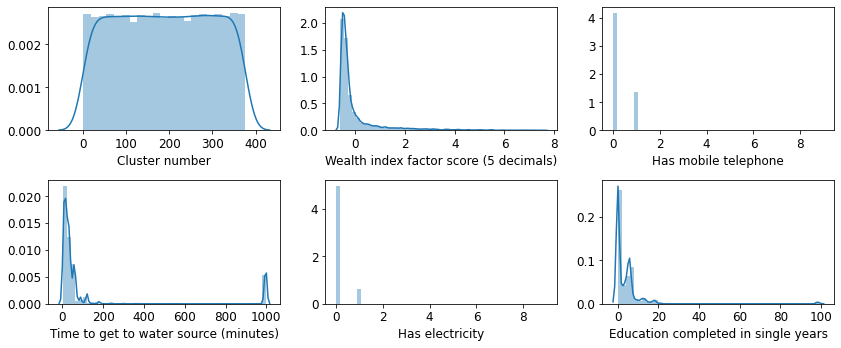

In [469]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(2, 3, sharex=False, figsize=(12,5))
sns.distplot(data_dhs[['Cluster number']],ax=ax[0][0])
ax[0][0].set_xlabel('Cluster number')
sns.distplot(data_dhs[['Wealth index factor score (5 decimals)']],ax=ax[0][1])
ax[0][1].set_xlabel('Wealth index factor score (5 decimals)')
sns.distplot(data_dhs[['Has mobile telephone']],ax=ax[0][2])
ax[0][2].set_xlabel('Has mobile telephone')
sns.distplot(data_dhs[['Time to get to water source (minutes)']],ax=ax[1][0])
ax[1][0].set_xlabel('Time to get to water source (minutes)')
sns.distplot(data_dhs[['Has electricity']],ax=ax[1][1])
ax[1][1].set_xlabel('Has electricity')
sns.distplot(data_dhs[['Education completed in single years']],ax=ax[1][2])
ax[1][2].set_xlabel('Education completed in single years')
plt.tight_layout()

In [470]:
data_dhs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8596 entries, 0 to 8595
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Cluster number                          8596 non-null   int16  
 1   Time to get to water source (minutes)   8596 non-null   int16  
 2   Has electricity                         8596 non-null   int8   
 3   Has mobile telephone                    8596 non-null   int8   
 4   Wealth index factor score (5 decimals)  8596 non-null   float64
 5   Education completed in single years     8596 non-null   int8   
dtypes: float64(1), int16(2), int8(3)
memory usage: 193.1 KB


In [471]:
data_dhs_clean = data_dhs.copy()
# keep 'Access to electricity' as 0 or 1
data_dhs_clean = data_dhs[data_dhs['Has electricity'] !=9]
# keep 'Has mobile telephone' as 0 or 1
data_dhs_clean = data_dhs[data_dhs['Has mobile telephone'] !=9]

# keep 'Has mobile telephone' as 0 or 1
#data_dhs_clean = data_dhs[data_dhs['Time to get to water source (minutes)'] <=500]

data_dhs_clean.dropna(inplace=True)

In [472]:
data_dhs_clean.describe()

,Cluster number,Time to get to water source (minutes),Has electricity,Has mobile telephone,Wealth index factor score (5 decimals),Education completed in single years
count,8592.000000,8592.000000,8592.000000,8592.000000,8592.000000,8592.000000
mean,188.912244,134.732542,0.117900,0.247090,-0.000006,3.920158
std,108.738756,297.976705,0.423603,0.431345,1.000155,9.589886
min,1.000000,1.000000,0.000000,0.000000,-0.612990,0.000000
25%,95.000000,15.000000,0.000000,0.000000,-0.492237,0.000000
50%,189.000000,30.000000,0.000000,0.000000,-0.369295,1.000000
75%,283.000000,60.000000,0.000000,0.000000,-0.064197,6.000000
max,376.000000,999.000000,9.000000,1.000000,7.533760,99.000000


### Groupby with cluster

In [473]:
data_dhs_cluster_1 = data_dhs_clean[[
    'Cluster number',
    'Time to get to water source (minutes)',
    'Has electricity',
     'Has mobile telephone',
    'Education completed in single years']].groupby(['Cluster number']).sum().reset_index()

In [474]:
data_dhs_cluster_2 = data_dhs_clean[[
    'Cluster number',
    'Wealth index factor score (5 decimals)']].groupby('Cluster number').median().reset_index()

In [475]:
data_dhs_cluster = data_dhs_cluster_1.merge(data_dhs_cluster_2, left_on='Cluster number', right_on='Cluster number')

In [476]:
data_dhs_cluster.head()

,Cluster number,Time to get to water source (minutes),Has electricity,Has mobile telephone,Education completed in single years,Wealth index factor score (5 decimals)
0,1,16006,16.0,20.0,113.0,0.939470
1,2,535,0.0,3.0,33.0,-0.437740
2,3,372,0.0,2.0,32.0,-0.356630
3,4,802,1.0,1.0,24.0,-0.444145
4,5,801,0.0,2.0,29.0,-0.498495


In [477]:
# rename the columns
data_dhs_cluster.columns = [
    'Cluster',
    'Access to water',
    'Access to electricity',
    'Acess to cellphone',
    'Education completed',
    'Wealth Index Factor Score']

In [478]:
data_dhs_cluster.describe()

,Cluster,Access to water,Access to electricity,Acess to cellphone,Education completed,Wealth Index Factor Score
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,188.500000,3078.781915,2.694149,5.646277,89.579787,-0.075440
std,108.686092,5163.012018,6.100454,6.341809,78.386251,0.865546
min,1.000000,203.000000,0.000000,0.000000,2.000000,-0.561870
25%,94.750000,623.500000,0.000000,1.000000,39.000000,-0.452694
50%,188.500000,967.500000,0.000000,3.000000,55.500000,-0.398265
75%,282.250000,2110.250000,1.000000,7.000000,120.500000,-0.279921
max,376.000000,23904.000000,25.000000,24.000000,518.000000,5.453145


### HIV data

In [450]:
dhs_hiv = pd.read_stata(dhs_hiv_file, convert_categoricals=False)

In [451]:
df_hiv = dhs_hiv[['hivclust', 'hiv03']]
df_hiv.columns= ['Cluster', 'hiv blood test result']

In [452]:
df_hiv_cluster = df_hiv.groupby('Cluster').sum().reset_index()

### Merge with GPS data

In [453]:
cluster_file = path+'DHS/BUGE61FL/BU_clusters_location.csv'
df_location = pd.read_csv(cluster_file)[['DHSCLUST', 'LATNUM', 'LONGNUM']]

In [454]:
df_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DHSCLUST  376 non-null    float64
 1   LATNUM    376 non-null    float64
 2   LONGNUM   376 non-null    float64
dtypes: float64(3)
memory usage: 8.9 KB


In [455]:
df_location.columns =['Cluster', 'latitude', 'longitude']

In [479]:
df_cluster = data_dhs_cluster.merge(df_hiv_cluster, how='inner', left_on='Cluster',right_on='Cluster' )
df_cluster = df_cluster.merge(df_location, how='inner', left_on='Cluster',right_on='Cluster')

In [480]:
df_cluster.head()

,Cluster,Access to water,Access to electricity,Acess to cellphone,Education completed,Wealth Index Factor Score,hiv blood test result,latitude,longitude
0,1,16006,16.0,20.0,113.0,0.939470,1,-3.368500,29.362186
1,2,535,0.0,3.0,33.0,-0.437740,0,-3.816132,29.963905
2,3,372,0.0,2.0,32.0,-0.356630,1,-2.505578,30.258659
3,4,802,1.0,1.0,24.0,-0.444145,0,-3.428142,30.257026
4,5,801,0.0,2.0,29.0,-0.498495,0,-3.758130,30.310477


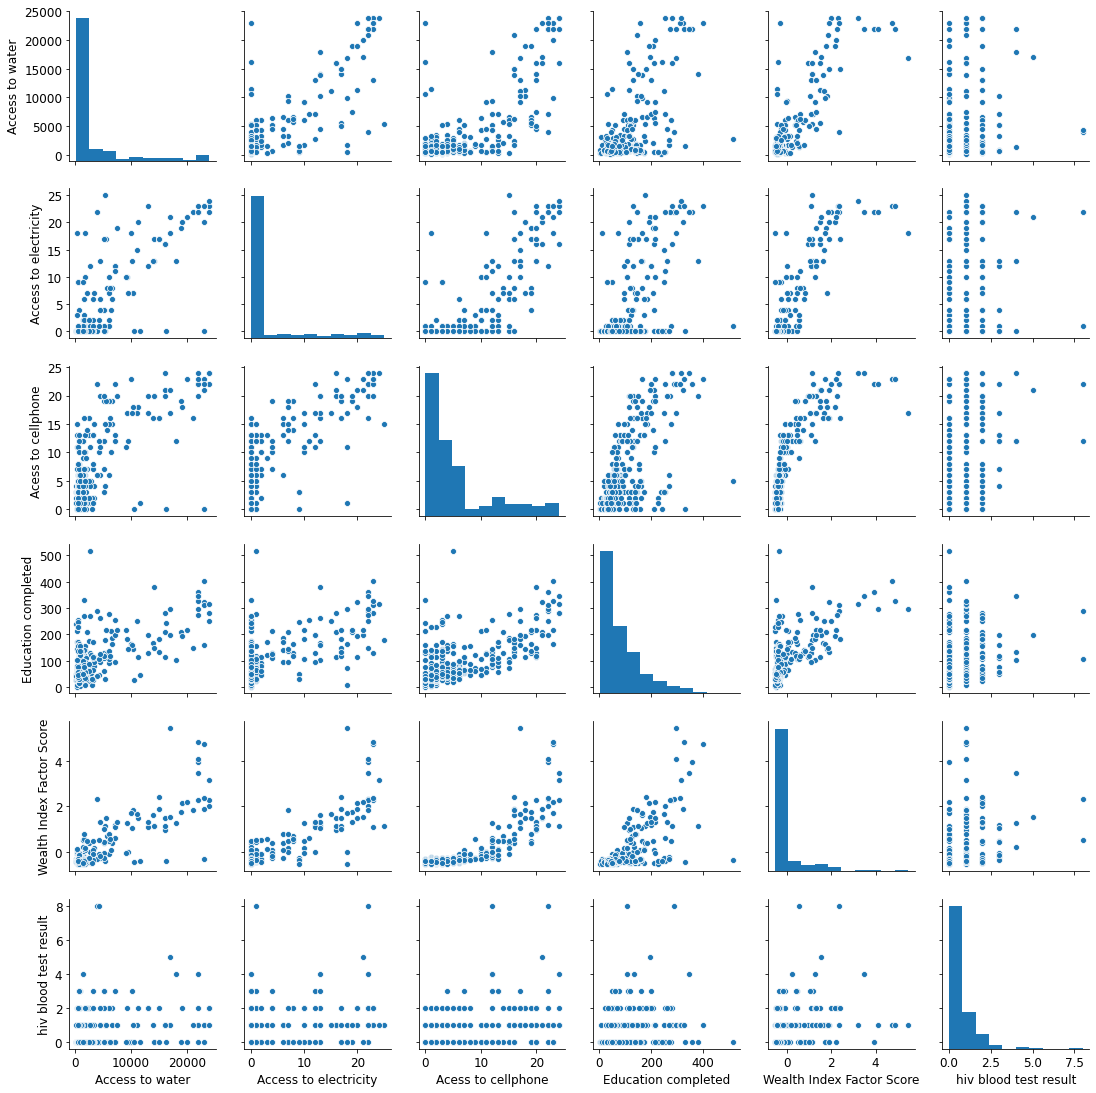

In [481]:
sns.pairplot(df_cluster.iloc[:,1:7])

In [482]:
df_cluster.to_csv( path+'DHS/DHS_data.csv', index=False)